# MNIST Tensorflow implementation

In [2]:
## libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
## import the data

(X,Y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
## split the (X,Y) into train and val set

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size= 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

## we have to convert it to a format that the convolution network (3 dimension)

x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:,:,:, np.newaxis]
x_val = x_val[:,:,:, np.newaxis]
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

## we have to normalise the data from between 0-1 (2**8 - 1 == 255)
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0


(48000, 28, 28)
(48000,)
(10000, 28, 28)
(10000,)
(12000, 28, 28)
(12000,)
(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [5]:
x_train.max()

1.0

In [6]:
### construct the model architecture

input_to_model = tf.keras.layers.Input(shape = (28,28,1), name = "input_layer")
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 2, padding = "same", activation= "relu")(input_to_model)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding= "same", activation= "relu" )(x)
x = tf.keras.layers.Conv2D(filters= 128, kernel_size = 3, strides = 2, padding= "same", activation= "relu")(x)

#we have to flatten it so that we can input into the neural network

x = tf.keras.layers.Flatten()(x)

## construct the neural network and feed the flatten input into each neurons
x = tf.keras.layers.Dense(256, activation= "relu")(x)
x = tf.keras.layers.Dense(512, activation= "relu")(x)

## since we are expecting 10 classification (0-9)
## softmax cause it is classification
## 10 because we are expecting 10 output
## no activation for regression

output = tf.keras.layers.Dense(10, activation= "softmax", name = "output_layer")(x)

In [7]:
output.shape

model = tf.keras.Model(inputs = input_to_model, outputs = output )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 512)               131584

In [8]:

# we have to get the optimizer and the loss, metric for classification
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [9]:
#we train the data and test the validation data
model_history = model.fit(x = x_train, y = y_train, validation_data=(x_val, y_val), batch_size= 32, epochs= 20)

Epoch 1/20
1500/1500 [==============================] - 19s 9ms/step - loss: 0.1742 - accuracy: 0.9459 - val_loss: 0.0800 - val_accuracy: 0.9755
Epoch 2/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0578 - val_accuracy: 0.9827
Epoch 3/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0590 - val_accuracy: 0.9827
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0503 - val_accuracy: 0.9858
Epoch 5/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0517 - val_accuracy: 0.9858
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0484 - val_accuracy: 0.9863
Epoch 7/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0619 - 

In [10]:
## evalution of test set

test_score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0722 - accuracy: 0.9862


In [11]:
# provides the dictionary for visualization
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

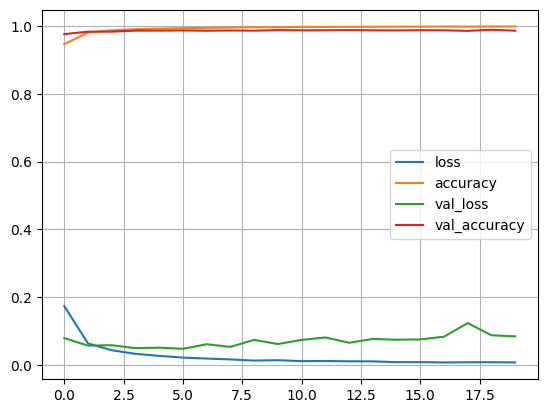

In [12]:
import pandas as pd
df = pd.DataFrame(model_history.history)

df.plot()
plt.grid(True)

313/313 [==============================] - 2s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

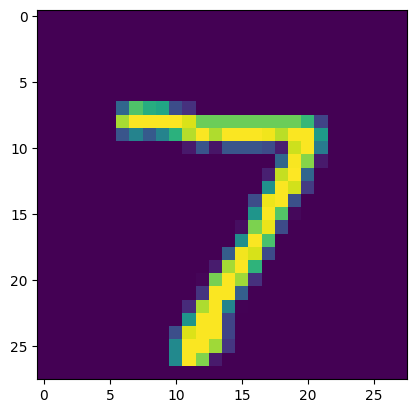

In [13]:
# to save the model
model.save("Hand_digit_model.h5")


# load data
model = tf.keras.models.load_model("Hand_digit_model.h5")


#predict

ypred = model.predict(x_test)
ypred[0]

plt.imshow(x_test[0])
#y comes in an array and the max(highest) prob is the one that is most likely  
ypred = np.argmax(ypred, axis = 1) 
ypred

0.986
0.986
0.986
[[ 972    0    2    0    0    1    2    0    1    2]
 [   1 1124    2    0    0    1    2    2    3    0]
 [   0    1 1023    1    0    0    1    2    4    0]
 [   0    1    1  987    0   12    0    1    1    7]
 [   0    0    3    0  966    0    2    0    0   11]
 [   0    0    0    3    0  885    1    0    0    3]
 [   3    2    1    0    1    1  949    0    1    0]
 [   0    4    6    1    1    0    0 1005    1   10]
 [   2    0    1    4    0    0    0    0  962    5]
 [   0    3    1    1    4    6    0    4    1  989]]


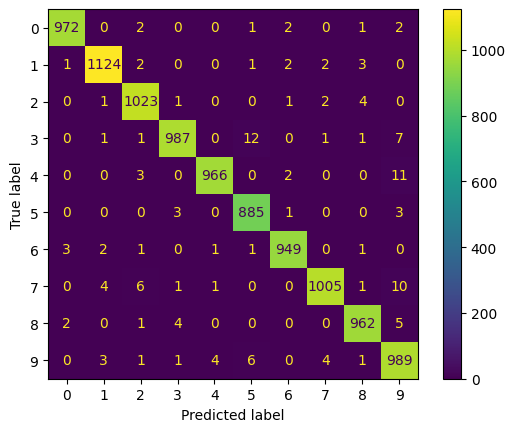

In [14]:
### metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

test_acc = round(accuracy_score(y_test, ypred),3)
test_pre = round(precision_score(y_test, ypred, average="weighted"),3)
test_rec = round(recall_score(y_test, ypred, average="weighted"),3)

print(test_acc)
print(test_pre)
print(test_rec)


cm = confusion_matrix(y_test, ypred, labels= [0,1,2,3,4,5,6,7,8,9])
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()
